<a href="https://colab.research.google.com/github/tsuli/Cognite/blob/main/SVM_fitting_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [ ]:
pip install data_describe

In [22]:
import data_describe as dd
df_train = pd.read_csv("/content/d_Y_X_final.train.csv")
df_test = pd.read_csv("/content/d_Y_X_final.test.csv")

In [6]:
df_train.head()

,time,Y,X1,X2,X3,X4,X5,X6,X7,X9,...,X55,X57,X58,X59,X60,X61,X62,X64,Y_label,segment_label
0,2021-06-05T14:28:00Z,163740.211405,0.012761,5.540504e-292,100.0,95253.211338,87.377501,2.930403,27.019576,3.269710,...,9296.821978,2.787496,0.41514,149.842629,13.880342,113.548967,9930.347129,2.931824,ok,1
1,2021-06-05T14:29:00Z,161649.456646,0.010480,4.136910e-291,100.0,92772.274084,77.327489,2.930403,26.527704,3.180652,...,9120.262630,2.708061,0.41514,258.096796,13.880342,110.961511,9106.971246,2.849984,ok,1
2,2021-06-05T14:30:00Z,160007.769080,0.008440,2.881062e-291,100.0,87406.175014,70.327076,2.930403,26.243853,3.133808,...,9023.330214,2.663394,0.41514,345.131538,13.880342,109.906412,8996.902712,2.807113,ok,1
3,2021-06-05T14:31:00Z,167500.892961,0.006632,1.772961e-292,100.0,99157.984099,65.869542,2.930403,27.215057,3.321609,...,9406.080997,2.828110,0.41514,413.104448,13.880342,116.698075,9269.043581,2.969899,ok,1
4,2021-06-05T14:32:00Z,161344.662409,0.005042,8.126073e-292,100.0,93182.244048,63.448168,2.930403,27.148238,3.156238,...,9143.500354,2.685062,0.41514,464.173121,13.880342,111.617753,9406.604304,2.827140,ok,1


In [9]:
df_train.shape

(201169, 45)

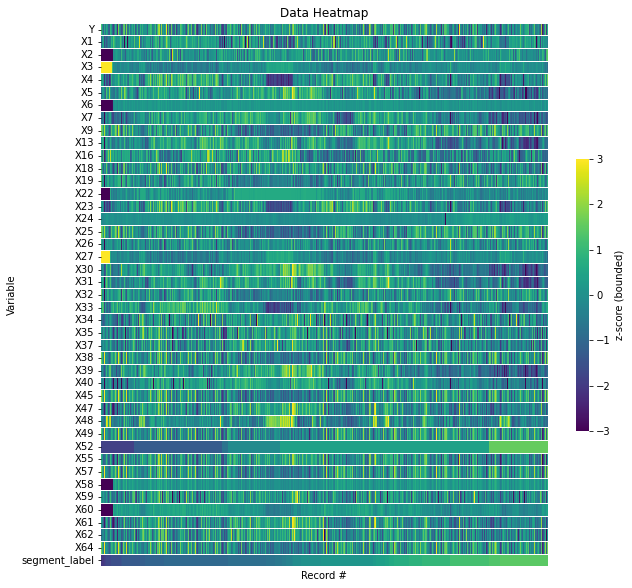

Heatmap Widget showing standardized values.

In [13]:
dd.data_heatmap(df_train)

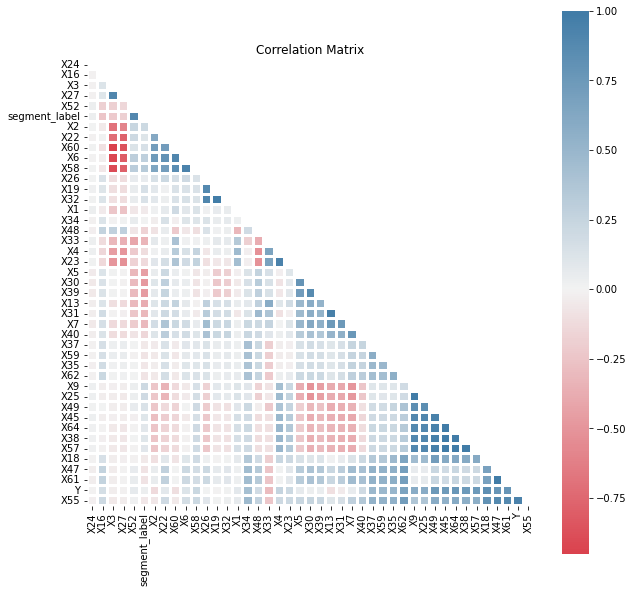

In [14]:
dd.correlation_matrix(df_train, cluster=True)

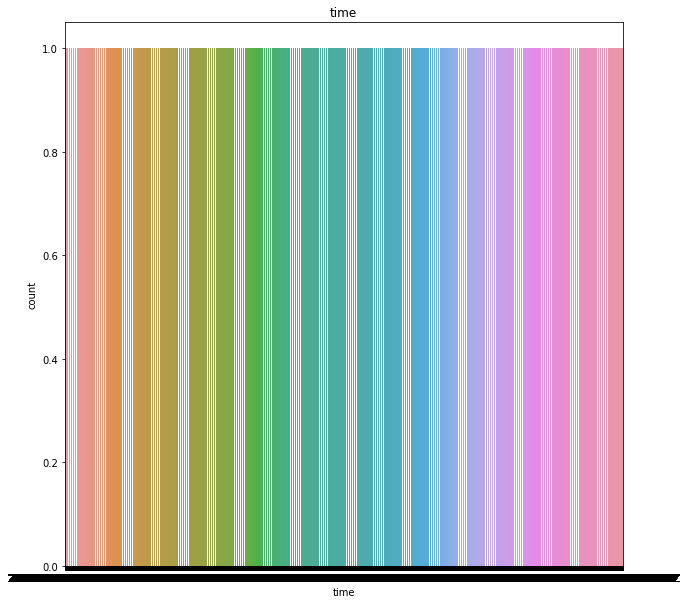

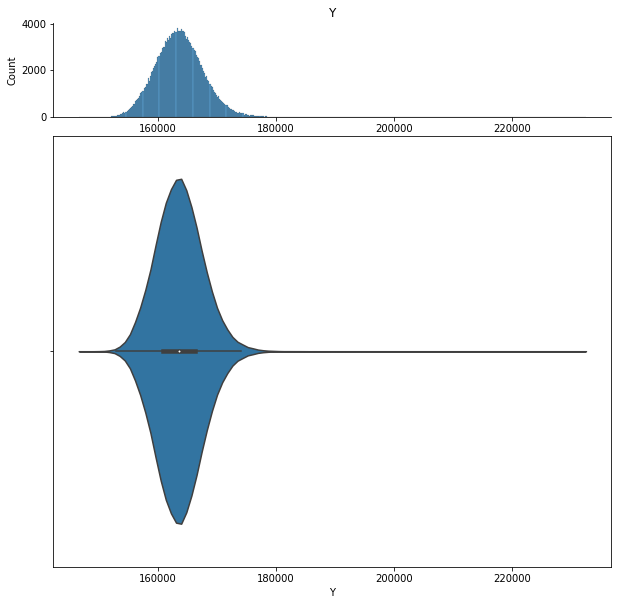

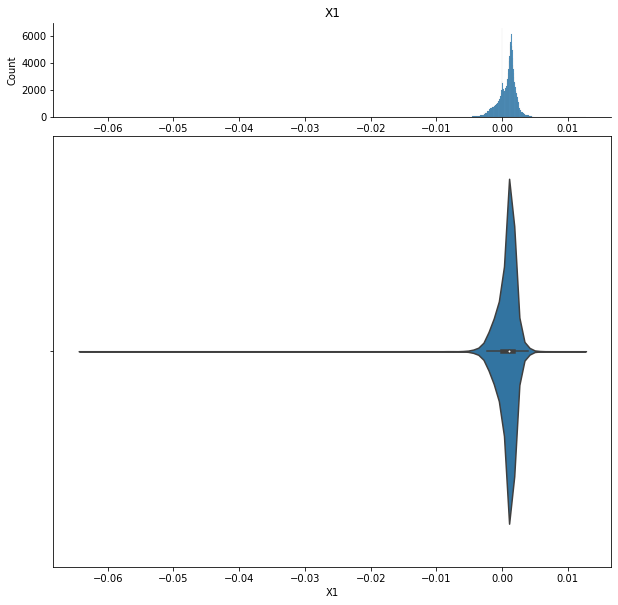

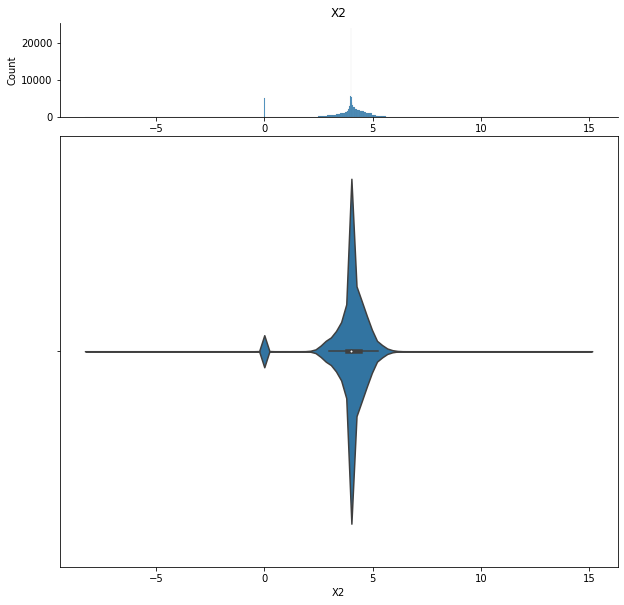

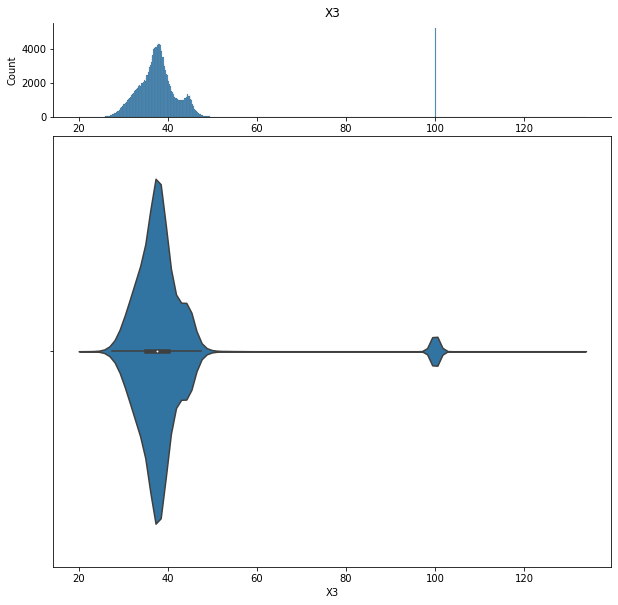

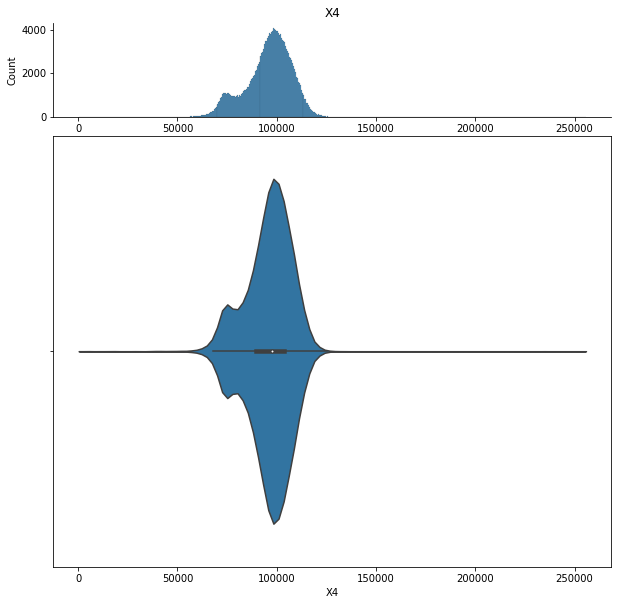

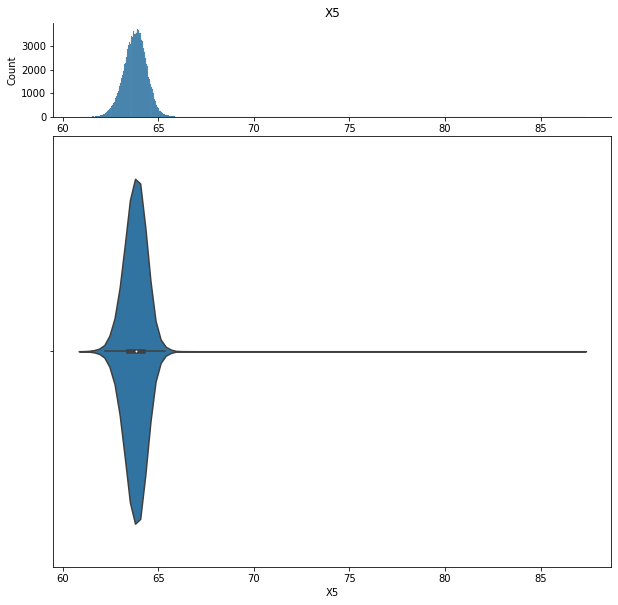

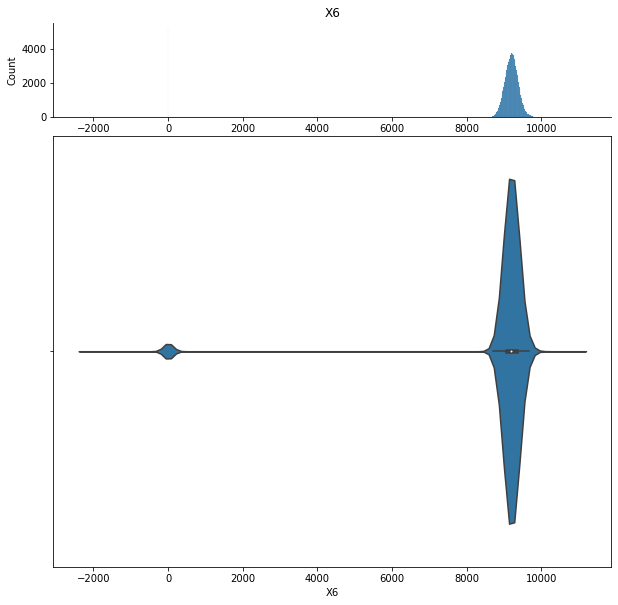

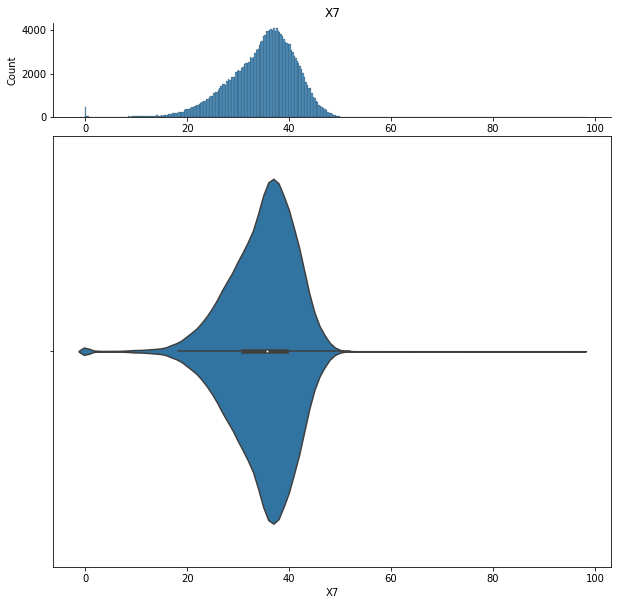

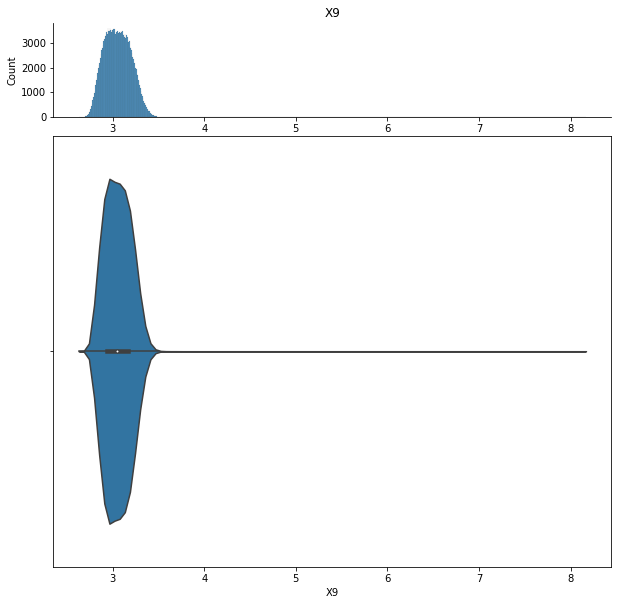

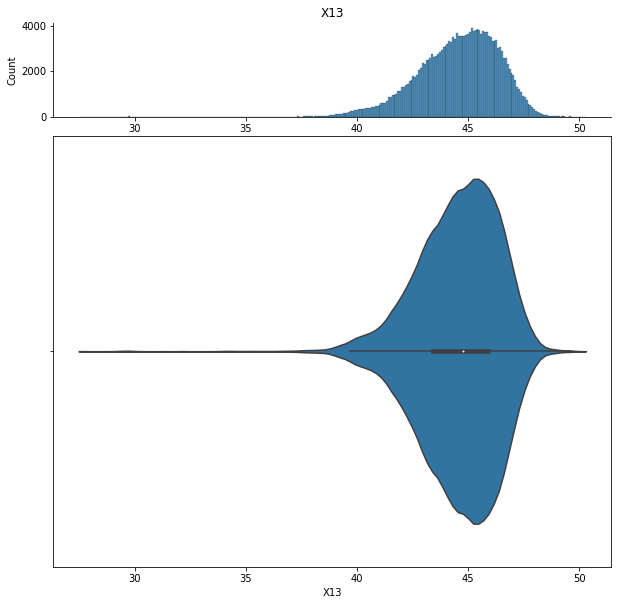

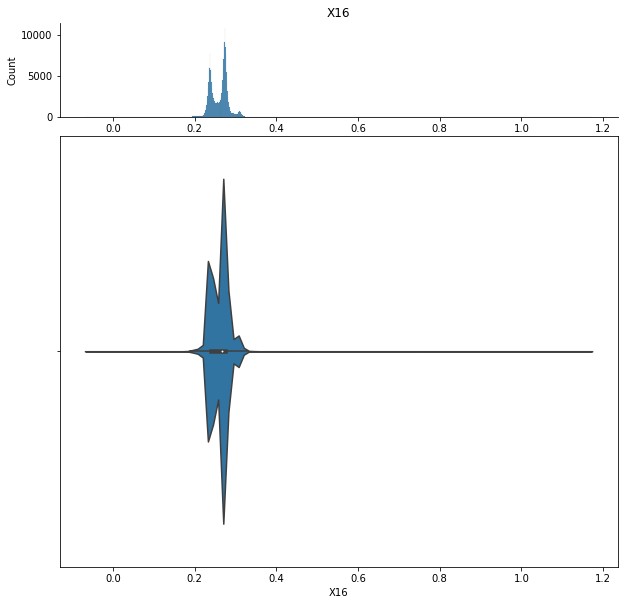

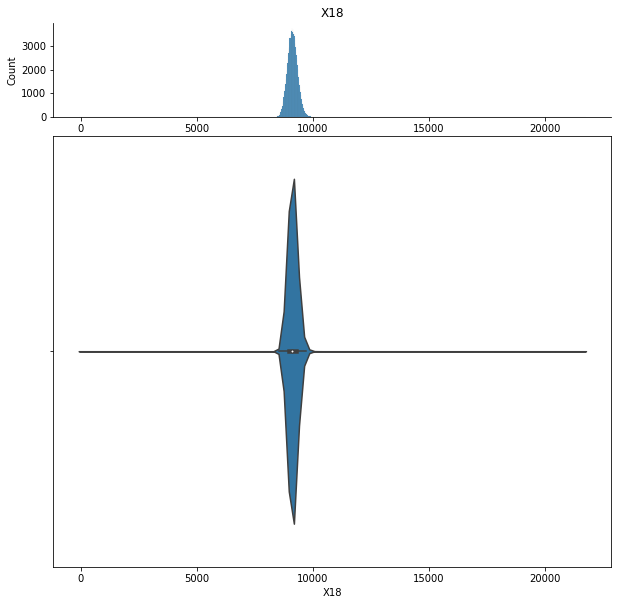

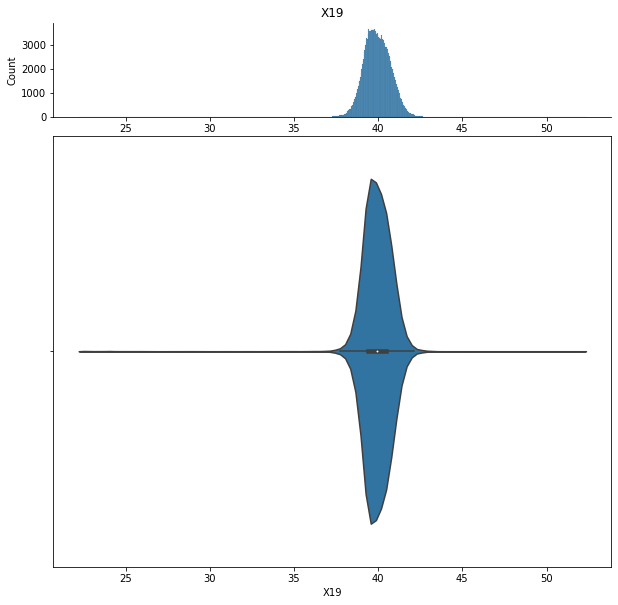

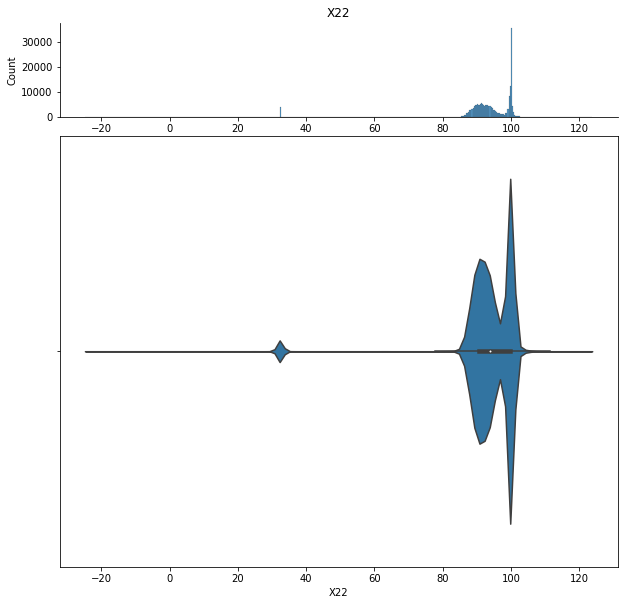

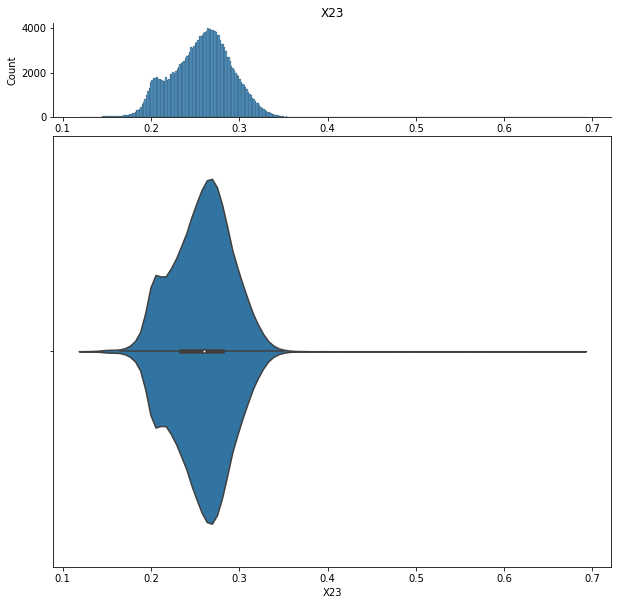

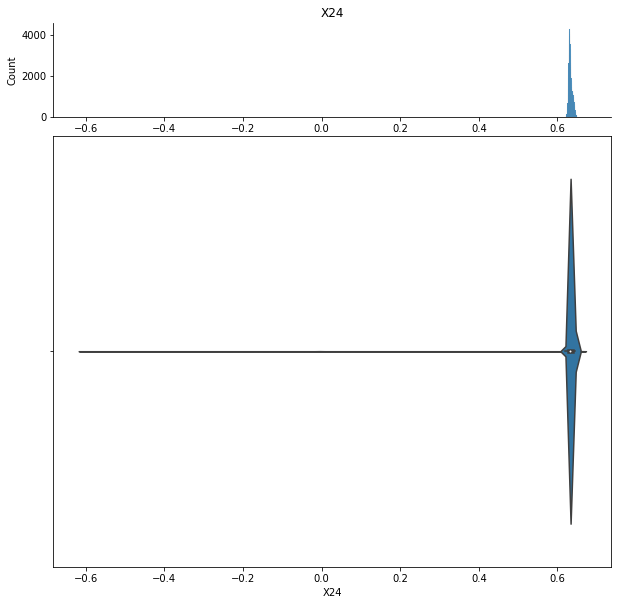

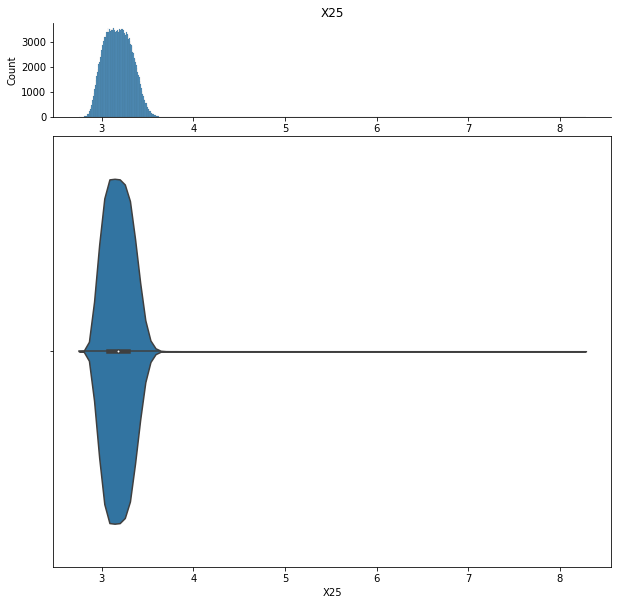

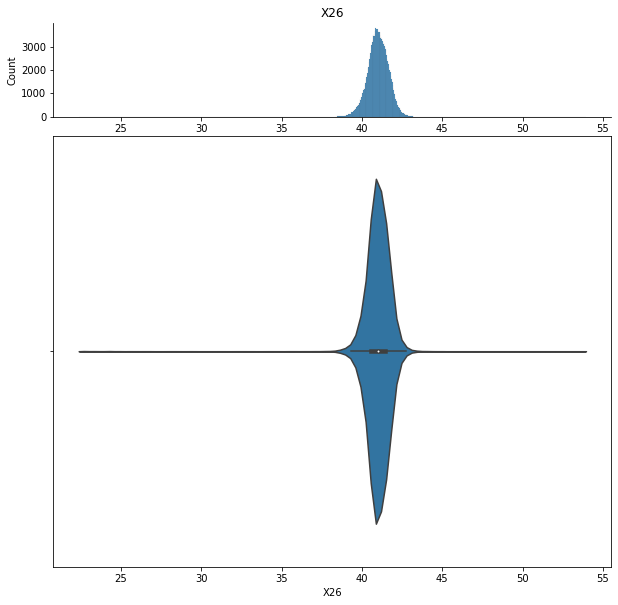

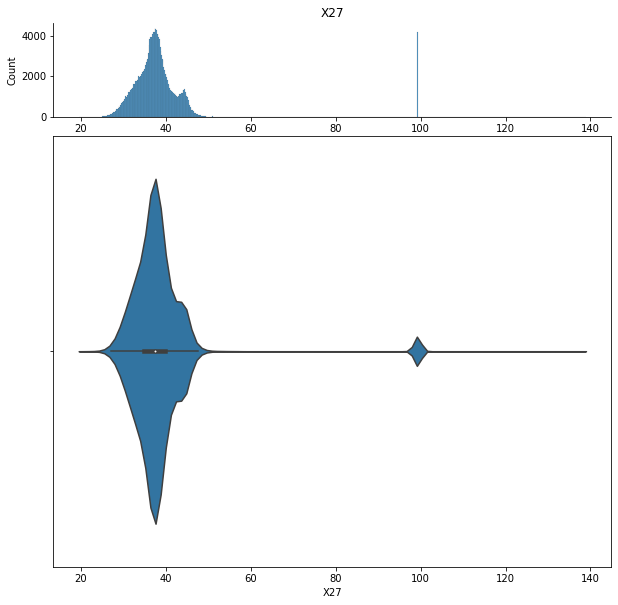

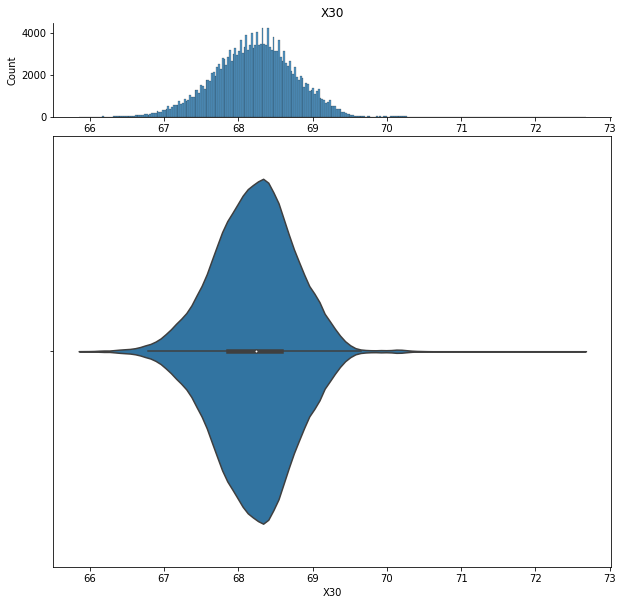

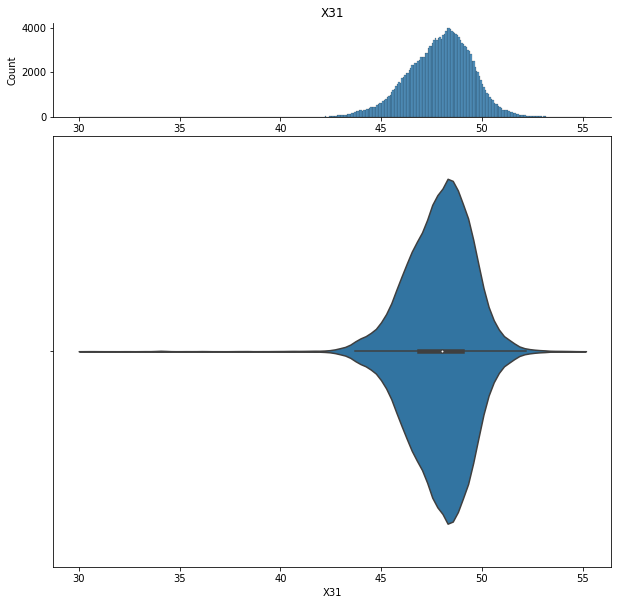

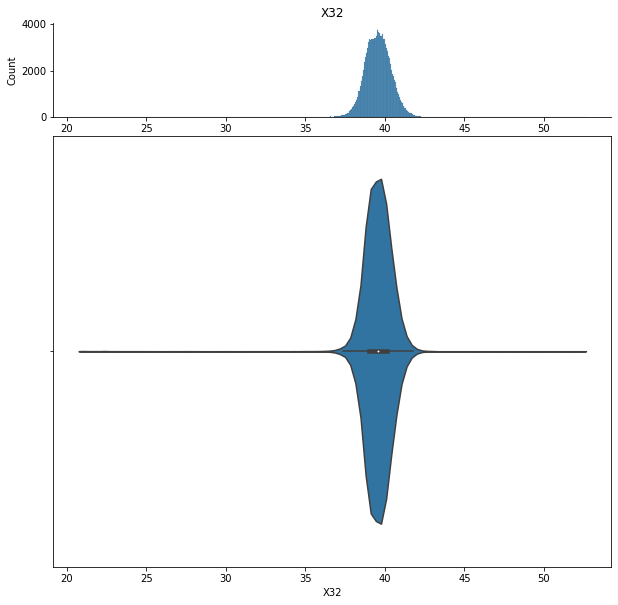

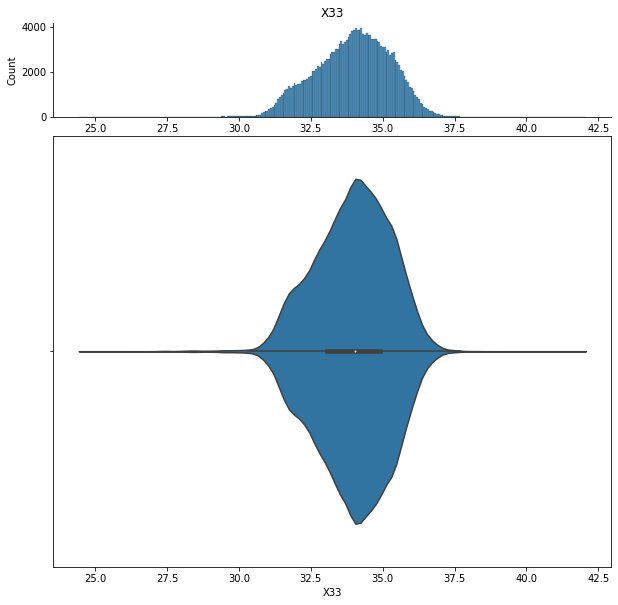

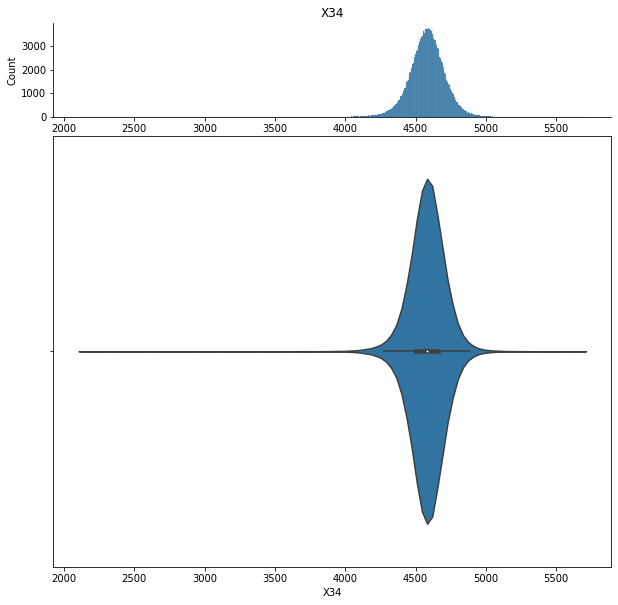

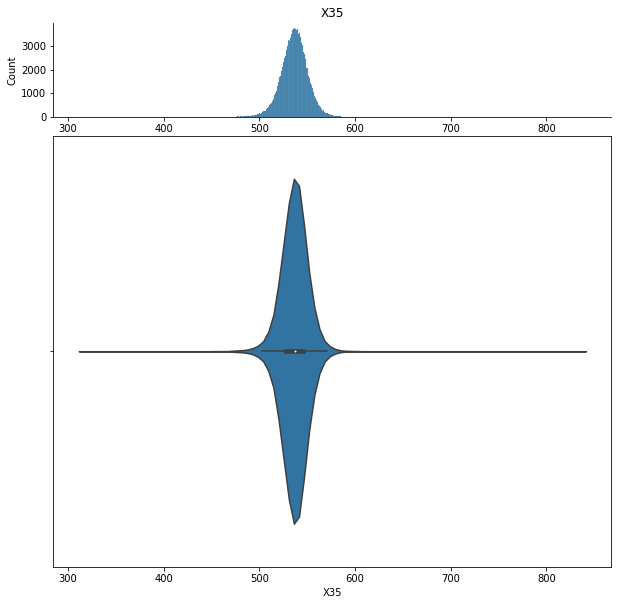

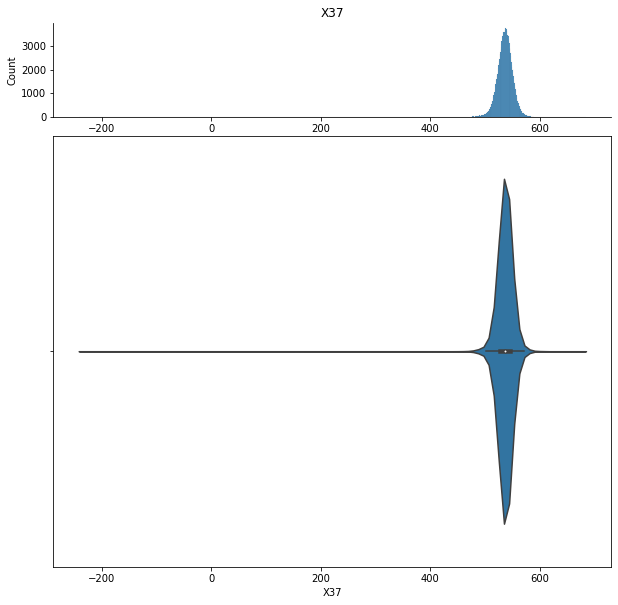

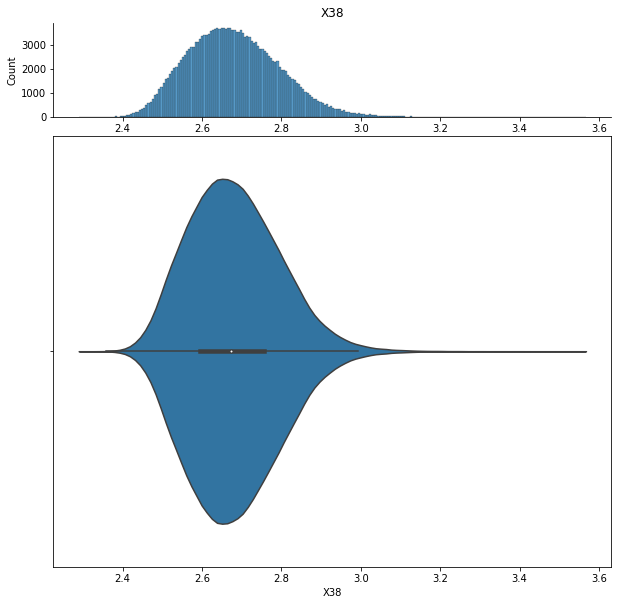

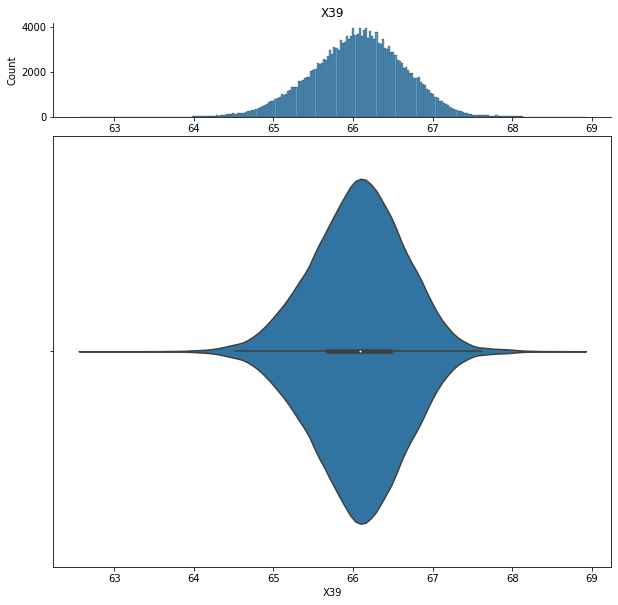

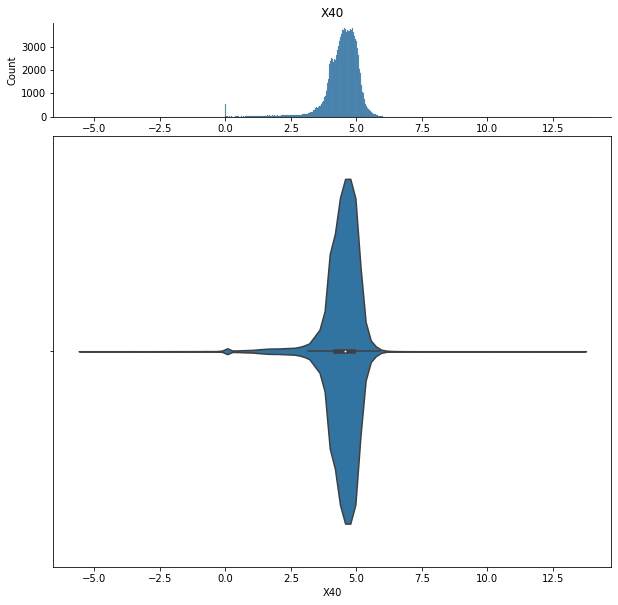

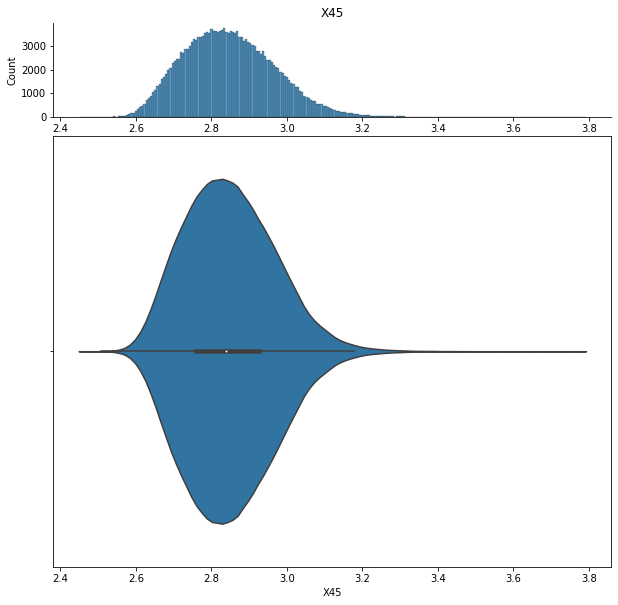

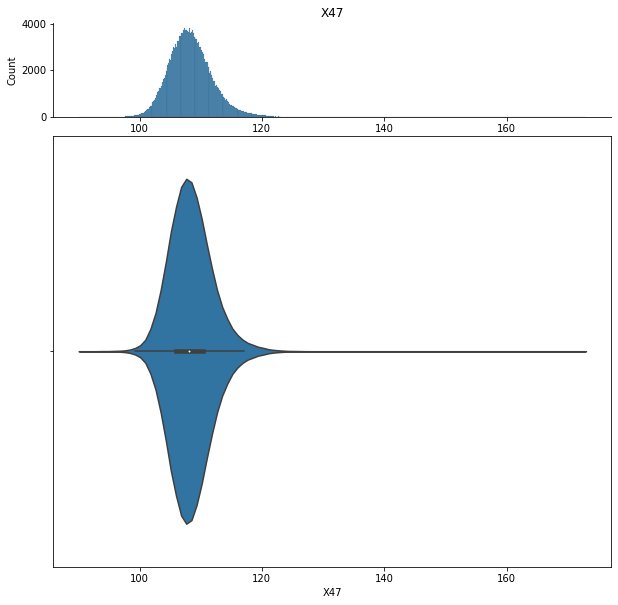

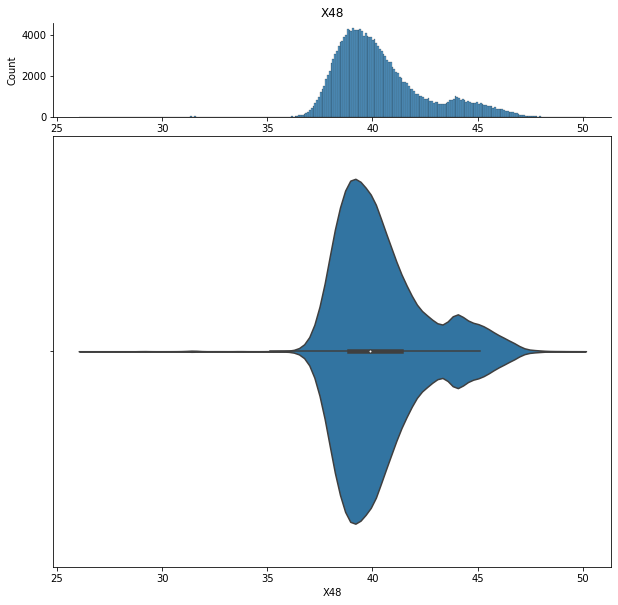

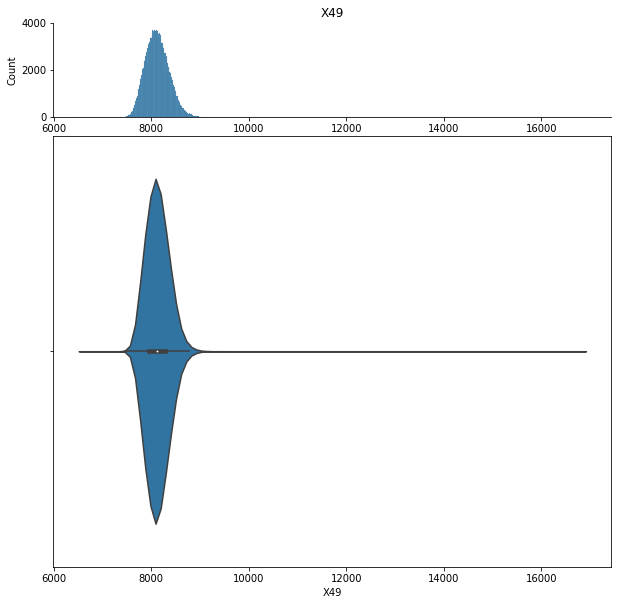

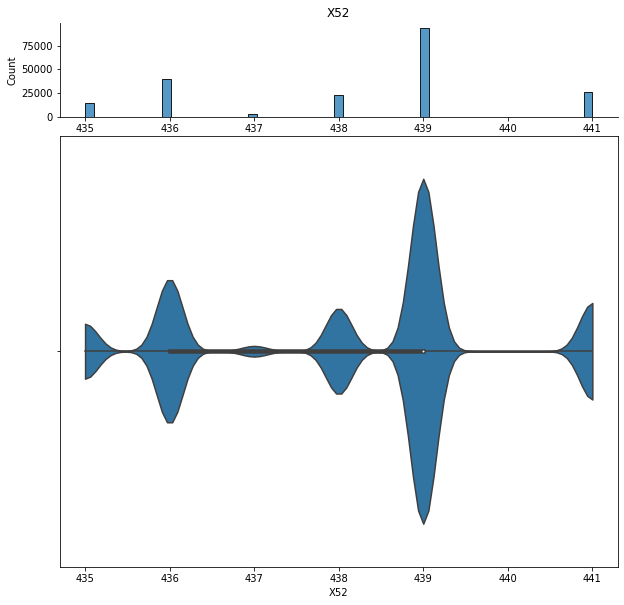

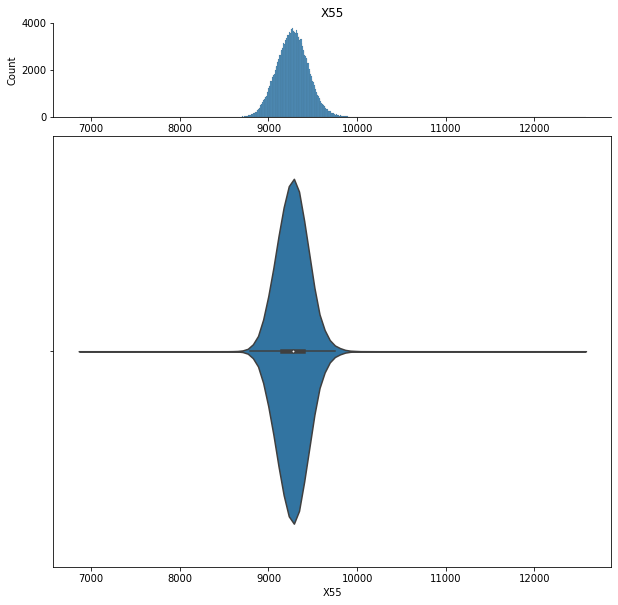

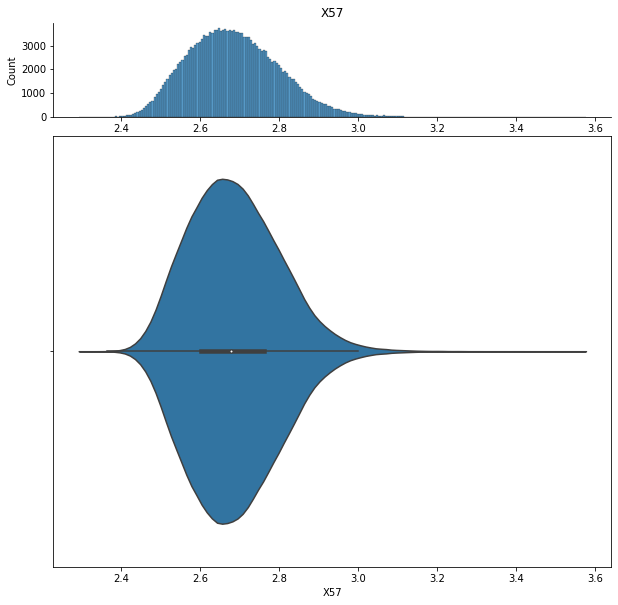

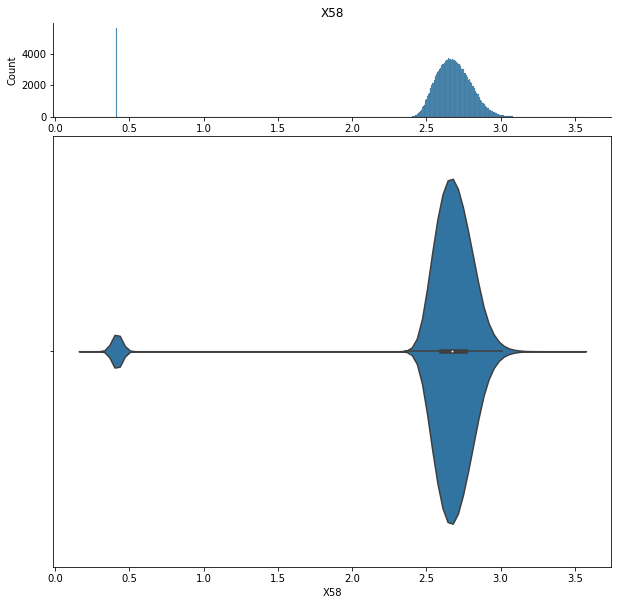

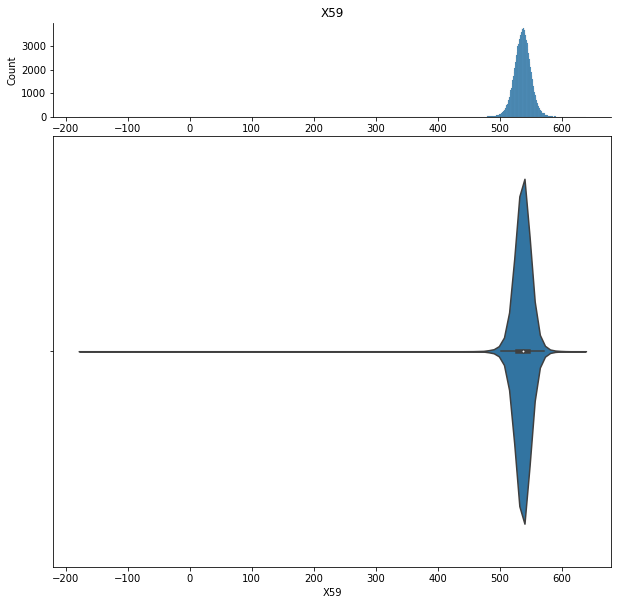

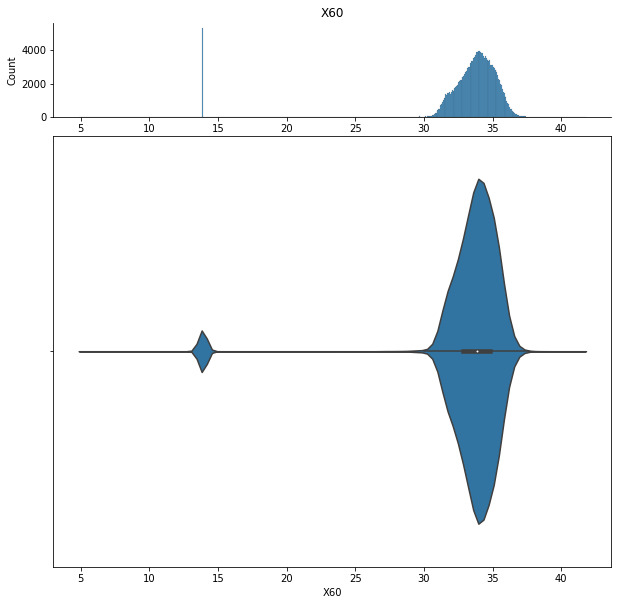

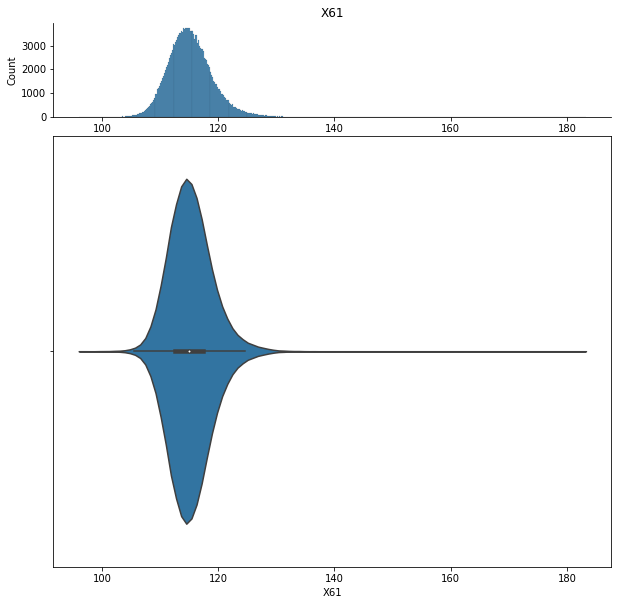

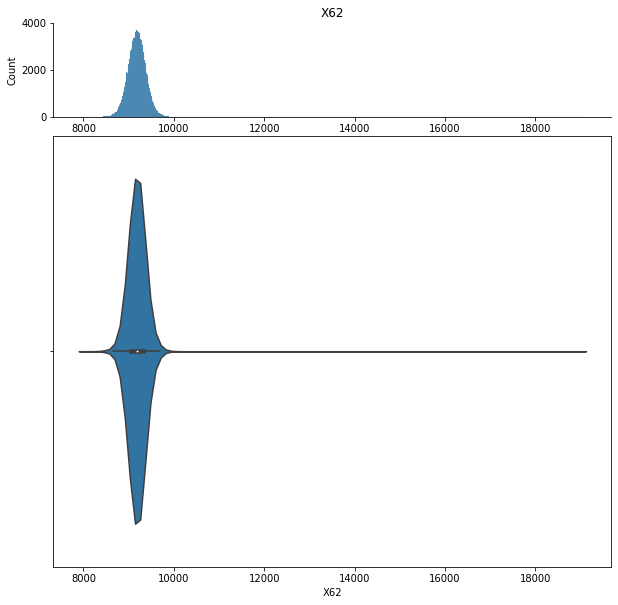

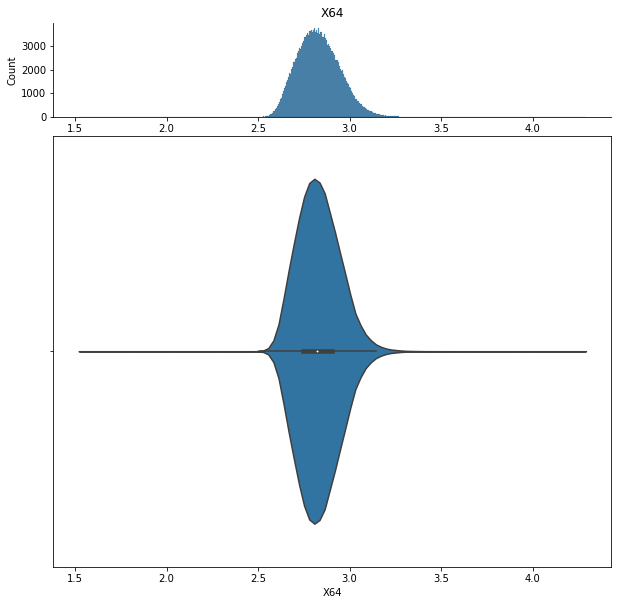

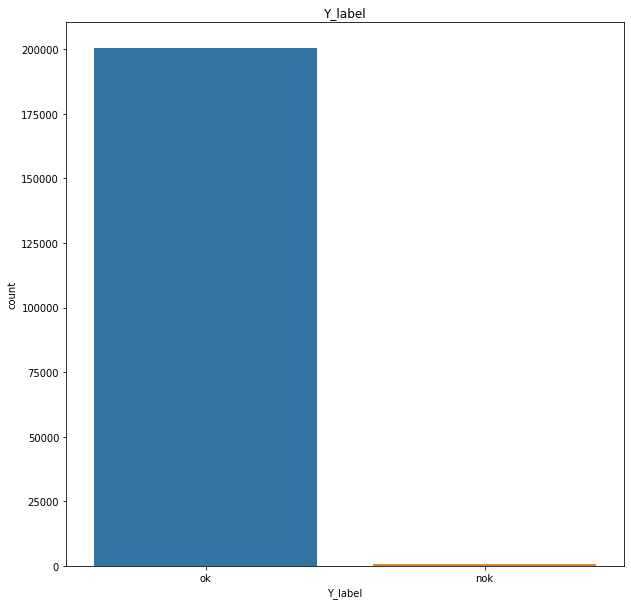

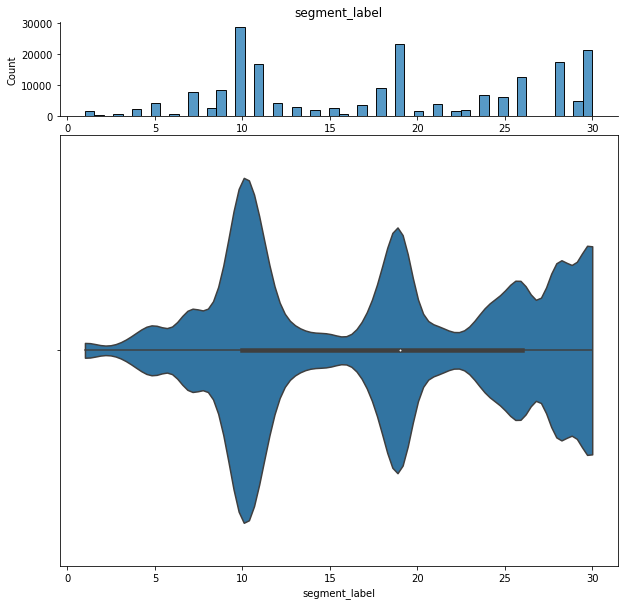

In [15]:
from IPython.display import display
# display is used to show plots from inside a loop
for col in df_train.columns:
    display(dd.distribution(df_train, plot_all=True).plot_distribution(col))

In [ ]:
Y_train = df_train["Y_label"]
X_train = df_train.iloc[:, 2:43 ]
Y_test = df_test["Y_label"]
X_test = df_test.iloc[:, 2:43 ]
X_test.head()

In [24]:
# https://scikit-learn.org/stable/modules/sgd.html#sgd-online-one-class-svm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)  # apply same transformation to test data

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
for train, test in tscv.split(X):
  print("%s %s" % (train, test))